# Compare to AFNI

In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from tools.base import load_collection, flatten_collection
from tools.viz import (plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [72]:
api = Neuroscout()

In [73]:
filename = Path('models') / 'single_predictor.json'

In [74]:
single_models = load_collection(filename)

In [75]:
single_models

{'speech': {'Sherlock': {'sherlockPart1': <Analysis hash_id=wK3Op name=speech dataset_id=21>},
  'HealthyBrainNetwork': {'movieDM': <Analysis hash_id=AobKG name=speech dataset_id=8>},
  'SherlockMerlin': {'MerlinMovie': <Analysis hash_id=Ar6VO name=speech dataset_id=5>,
   'SherlockMovie': <Analysis hash_id=MzqbZ name=speech dataset_id=5>},
  'Life': {'life': <Analysis hash_id=Adp4e name=speech dataset_id=9>},
  'Raiders': {'raiders': <Analysis hash_id=M8LX1 name=speech dataset_id=10>},
  'SchematicNarrative': {'perception': <Analysis hash_id=AVr83 name=speech dataset_id=20>},
  'studyforrest': {},
  'ParanoiaStory': {'story': <Analysis hash_id=A1GkD name=speech dataset_id=18>},
  'LearningTemporalStructure': {'movie': <Analysis hash_id=MNQ0q name=speech dataset_id=19>},
  'Budapest': {'movie': <Analysis hash_id=w0gBX name=speech dataset_id=27>}},
 'rms': {'Sherlock': {'sherlockPart1': <Analysis hash_id=MXmd3 name=rms dataset_id=21>},
  'HealthyBrainNetwork': {'movieDM': <Analysis hash

In [76]:
buildings = single_models['building']

In [77]:
m = buildings['Budapest']['movie']

In [78]:
ni1 = buildings['Budapest']['movie'].load_uploads(estimator='nistats', stat='t')[0]

In [79]:
ni2 = buildings['Budapest']['movie'].load_uploads(estimator='afni', stat='t')[0]

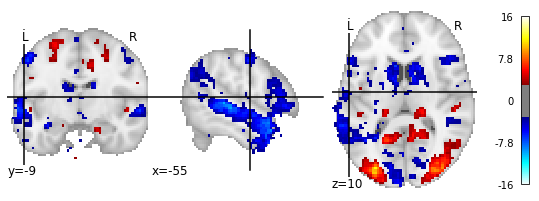

In [93]:
buildings['Budapest']['movie'].plot_uploads(estimator='nistats', stat='t', plot_args={'threshold': 3, 'cut_coords':[-55, -9, 10]})

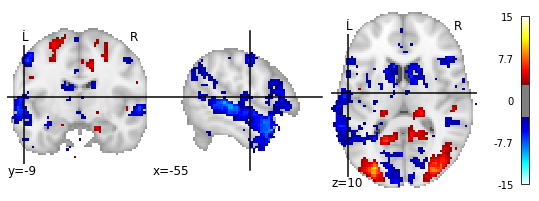

In [92]:
buildings['Budapest']['movie'].plot_uploads(estimator='afni', stat='t', plot_args={'threshold': 3, 'cut_coords':[-55, -9, 10]})

In [81]:
a = ni1[0].get_data().flatten()
b = ni2[0].get_data().flatten()

/home/zorro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.
/home/zorro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [82]:
import numpy as np

In [83]:
np.corrcoef(a, b)

array([[1.        , 0.99288346],
       [0.99288346, 1.        ]])